In [1]:
# Download MNIST data and save to local drive
import os
import urllib.request

# Create a local folder for datasets
os.makedirs("./data", exist_ok=True)

# load dataset to the directory--as you can see, you must load train sets and test sets separately
urllib.request.urlretrieve('http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz', filename='./data/train-images.gz')
urllib.request.urlretrieve('http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz', filename='./data/train-labels.gz')
urllib.request.urlretrieve('http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz', filename='./data/test-images.gz')
urllib.request.urlretrieve('http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz', filename='./data/test-labels.gz')

('./data/test-labels.gz', <http.client.HTTPMessage at 0x22186548d48>)

In [4]:
# To split the data into training and test sets
# We have to unzip the files and return them back in numpy arrays
import numpy as np
import struct
import gzip

# load compressed MNIST gz files and return numpy arrays
def load_data(filename, label=False):
    with gzip.open(filename) as gz:
        # struct.unpack(format, buffer)
        # Unpack from the buffer buffer according to the format string format.        
        struct.unpack('I', gz.read(4)) 
        
        n_items = struct.unpack('>I', gz.read(4)) 
        
        if not label: # training datasets
            n_rows = struct.unpack('>I', gz.read(4))[0]
            n_cols = struct.unpack('>I', gz.read(4))[0]
            res = np.frombuffer(gz.read(n_items[0] * n_rows * n_cols), dtype=np.uint8)
            res = res.reshape(n_items[0], n_rows * n_cols)
            
        else:
            res = np.frombuffer(gz.read(n_items[0]), dtype=np.uint8)
            res = res.reshape(n_items[0], 1)
    return res

print('Functions defined')            

Functions defined


In [5]:
# Load the data
# To help the model converge faster, shrink the intensity values (X) from 0-255 to 0-1

X_train = load_data('./data/train-images.gz', False) / 255.0
y_train = load_data('./data/train-labels.gz', True).reshape(-1)

X_test = load_data('./data/test-images.gz', False) / 255.0
y_test = load_data('./data/test-labels.gz', True).reshape(-1)

print('Data loaded')

Data loaded


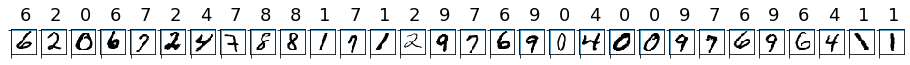

Done


In [8]:
# Use Matplotlib to display random examples in this training dataset
%matplotlib inline 

import matplotlib.pyplot as plt

count = 0
sample_size = 30
plt.figure(figsize = (16, 6))

# np.random.permutation: Randomly permute a sequence, or return a permuted range.
for i in np.random.permutation(X_train.shape[0])[:sample_size]:
    count = count + 1
    plt.subplot(1, sample_size, count)
    plt.axhline('')
    plt.axvline('')
    plt.text(x=10, y=-10, s=y_train[i], fontsize=18) #show the label
    plt.imshow(X_train[i].reshape(28, 28), cmap=plt.cm.Greys)
    
plt.show()

print('Done')

In [11]:
# Execute simple logistic regression modeling by using Scikit-Learn
from sklearn.linear_model import LogisticRegression

# Load the model
model = LogisticRegression()
# Fit the model
model.fit(X_train, y_train)

# Evaluate the model
prediction = model.predict(X_test)
print(np.average(prediction == y_test))


E:\AppData\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\AppData\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.9202
